### Extrayendo las entradas

In [0]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import KMeans
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content'

In [3]:
directorio = 'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA'
directorio
a = "Titulo_vector.csv"
b = os.path.join(directorio,a)
data = pd.read_csv(b)
data.head()
y_data = data.ix[:,data.columns =='Y']
y_data.head()

,Y
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [4]:
directorio = 'drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2'
directorio
a = "tabla_entra_orb_50.xlsx"
b = os.path.join(directorio,a)
archivo = pd.read_excel(b)
archivo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2,2,4,5,2,9,1,3,3,3,4,4,5,6,3,5,2,5,4,2,1,1,2,4,0,2,1,0,1,7,6,6,6,4,6,9,1,2,1,5,6,7,0,5,4,3,4,3,5,4
1,7,4,4,5,2,5,5,1,3,2,4,2,1,5,4,5,3,2,5,3,3,3,7,6,2,1,3,1,2,5,2,5,4,5,10,2,5,2,0,3,1,1,5,5,8,2,6,6,3,2
2,3,1,8,7,2,8,2,2,8,3,9,4,5,2,6,0,7,4,4,3,3,4,3,1,2,4,5,3,1,0,5,3,2,2,5,1,6,1,3,0,7,2,5,5,9,3,2,6,2,1
3,2,2,6,2,7,2,2,3,1,7,3,4,4,10,1,8,4,0,4,0,6,2,4,6,7,2,4,1,11,1,0,4,2,7,4,4,2,3,2,3,2,4,8,4,2,4,2,7,1,3
4,2,2,5,4,3,2,1,1,3,5,5,4,8,2,2,3,3,5,4,3,3,1,4,6,5,4,4,0,3,5,5,7,6,10,6,3,3,1,1,2,3,0,3,2,5,2,2,8,6,2


In [5]:
archivo.shape

(10350, 50)

In [6]:
x_total = archivo
x_total.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2,2,4,5,2,9,1,3,3,3,4,4,5,6,3,5,2,5,4,2,1,1,2,4,0,2,1,0,1,7,6,6,6,4,6,9,1,2,1,5,6,7,0,5,4,3,4,3,5,4
1,7,4,4,5,2,5,5,1,3,2,4,2,1,5,4,5,3,2,5,3,3,3,7,6,2,1,3,1,2,5,2,5,4,5,10,2,5,2,0,3,1,1,5,5,8,2,6,6,3,2
2,3,1,8,7,2,8,2,2,8,3,9,4,5,2,6,0,7,4,4,3,3,4,3,1,2,4,5,3,1,0,5,3,2,2,5,1,6,1,3,0,7,2,5,5,9,3,2,6,2,1
3,2,2,6,2,7,2,2,3,1,7,3,4,4,10,1,8,4,0,4,0,6,2,4,6,7,2,4,1,11,1,0,4,2,7,4,4,2,3,2,3,2,4,8,4,2,4,2,7,1,3
4,2,2,5,4,3,2,1,1,3,5,5,4,8,2,2,3,3,5,4,3,3,1,4,6,5,4,4,0,3,5,5,7,6,10,6,3,3,1,1,2,3,0,3,2,5,2,2,8,6,2


### Escalando variables

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_x = scaler.fit_transform(x_total)
# GUARDAR EL MODELO

In [8]:
import joblib
filename = os.path.join(directorio,"Scaler_Orb_50")
joblib.dump(scaler, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/Scaler_Orb_50']

In [9]:
x_total_scal = pd.DataFrame(scaled_x)
x_total_scal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.691256,-0.470274,0.244197,0.707161,-0.587438,1.635095,-0.773615,-0.317361,-0.059815,-0.061403,0.286203,0.087134,0.446936,0.734303,-0.103261,0.371226,-0.471523,0.477769,0.237483,-0.478201,-1.026257,-0.951853,-0.464018,0.164837,-0.927986,-0.507039,-0.878399,-0.839351,-0.707055,1.115324,1.058192,1.087177,0.787848,0.268602,0.662139,1.603516,-0.705953,-0.585084,-0.817581,0.725835,0.737719,0.837079,-1.211336,0.902087,0.464410,-0.118128,-0.044519,0.023385,0.476647,-0.032339
1,1.356046,0.252956,0.244197,0.707161,-0.587438,0.310069,0.681460,-0.908663,-0.059815,-0.359907,0.286203,-0.334482,-0.851714,0.406856,0.208875,0.371226,-0.131411,-0.291667,0.585733,-0.134064,-0.418292,-0.254241,1.420679,0.880920,-0.284307,-0.836367,-0.346208,-0.569744,-0.358229,0.457081,-0.458430,0.706531,0.162116,0.609460,1.994139,-0.486108,0.742910,-0.585084,-1.134117,0.051443,-0.874756,-0.834280,0.687454,0.902087,2.020460,-0.421959,0.579835,1.205981,-0.256057,-0.634341
2,-0.281796,-0.831889,1.800501,1.445942,-0.587438,1.303839,-0.409846,-0.613012,1.607069,-0.061403,2.144312,0.087134,0.446936,-0.575484,0.833147,-1.286749,1.229037,0.221291,0.237483,-0.134064,-0.418292,0.094565,-0.087078,-0.909287,-0.284307,0.151618,0.185984,-0.030529,-0.707055,-1.188525,0.679036,-0.054762,-0.463616,-0.413113,0.329139,-0.784626,1.105125,-0.838076,-0.184509,-0.960145,1.060214,-0.555720,0.687454,0.902087,2.409473,-0.118128,-0.668873,1.205981,-0.622409,-0.935342
3,-0.691256,-0.470274,1.022349,-0.401012,1.265990,-0.683701,-0.409846,-0.317361,-0.726568,1.132616,-0.085419,0.087134,0.122274,2.044090,-0.727533,1.366012,0.208701,-0.804625,0.237483,-1.166474,0.493656,-0.603047,0.289861,0.880920,1.324890,-0.507039,-0.080112,-0.569744,2.781205,-0.859404,-1.216741,0.325885,-0.463616,1.291175,-0.003861,0.110927,-0.343737,-0.332092,-0.501045,0.051443,-0.552261,0.001400,1.826727,0.461931,-0.313616,0.185704,-0.668873,1.600179,-0.988760,-0.333340
4,-0.691256,-0.470274,0.633273,0.337770,-0.216753,-0.683701,-0.773615,-0.908663,-0.059815,0.535607,0.657825,0.087134,1.420924,-0.575484,-0.415397,-0.291964,-0.131411,0.477769,0.237483,-0.134064,-0.418292,-0.951853,0.289861,0.880920,0.681211,0.151618,-0.080112,-0.839351,-0.009403,0.457081,0.679036,1.467823,0.787848,2.313748,0.662139,-0.187590,0.018478,-0.838076,-0.817581,-0.285753,-0.229766,-1.112840,-0.072062,-0.418383,0.853422,-0.421959,-0.668873,1.994377,0.842998,-0.634341


In [0]:
tabla_final_orb_x_y = x_total_scal

In [0]:
tabla_final_orb_x_y['Y'] = y_data


In [12]:
tabla_final_orb_x_y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Y
0,-0.691256,-0.470274,0.244197,0.707161,-0.587438,1.635095,-0.773615,-0.317361,-0.059815,-0.061403,0.286203,0.087134,0.446936,0.734303,-0.103261,0.371226,-0.471523,0.477769,0.237483,-0.478201,-1.026257,-0.951853,-0.464018,0.164837,-0.927986,-0.507039,-0.878399,-0.839351,-0.707055,1.115324,1.058192,1.087177,0.787848,0.268602,0.662139,1.603516,-0.705953,-0.585084,-0.817581,0.725835,0.737719,0.837079,-1.211336,0.902087,0.464410,-0.118128,-0.044519,0.023385,0.476647,-0.032339,1.0
1,1.356046,0.252956,0.244197,0.707161,-0.587438,0.310069,0.681460,-0.908663,-0.059815,-0.359907,0.286203,-0.334482,-0.851714,0.406856,0.208875,0.371226,-0.131411,-0.291667,0.585733,-0.134064,-0.418292,-0.254241,1.420679,0.880920,-0.284307,-0.836367,-0.346208,-0.569744,-0.358229,0.457081,-0.458430,0.706531,0.162116,0.609460,1.994139,-0.486108,0.742910,-0.585084,-1.134117,0.051443,-0.874756,-0.834280,0.687454,0.902087,2.020460,-0.421959,0.579835,1.205981,-0.256057,-0.634341,0.0
2,-0.281796,-0.831889,1.800501,1.445942,-0.587438,1.303839,-0.409846,-0.613012,1.607069,-0.061403,2.144312,0.087134,0.446936,-0.575484,0.833147,-1.286749,1.229037,0.221291,0.237483,-0.134064,-0.418292,0.094565,-0.087078,-0.909287,-0.284307,0.151618,0.185984,-0.030529,-0.707055,-1.188525,0.679036,-0.054762,-0.463616,-0.413113,0.329139,-0.784626,1.105125,-0.838076,-0.184509,-0.960145,1.060214,-0.555720,0.687454,0.902087,2.409473,-0.118128,-0.668873,1.205981,-0.622409,-0.935342,1.0
3,-0.691256,-0.470274,1.022349,-0.401012,1.265990,-0.683701,-0.409846,-0.317361,-0.726568,1.132616,-0.085419,0.087134,0.122274,2.044090,-0.727533,1.366012,0.208701,-0.804625,0.237483,-1.166474,0.493656,-0.603047,0.289861,0.880920,1.324890,-0.507039,-0.080112,-0.569744,2.781205,-0.859404,-1.216741,0.325885,-0.463616,1.291175,-0.003861,0.110927,-0.343737,-0.332092,-0.501045,0.051443,-0.552261,0.001400,1.826727,0.461931,-0.313616,0.185704,-0.668873,1.600179,-0.988760,-0.333340,0.0
4,-0.691256,-0.470274,0.633273,0.337770,-0.216753,-0.683701,-0.773615,-0.908663,-0.059815,0.535607,0.657825,0.087134,1.420924,-0.575484,-0.415397,-0.291964,-0.131411,0.477769,0.237483,-0.134064,-0.418292,-0.951853,0.289861,0.880920,0.681211,0.151618,-0.080112,-0.839351,-0.009403,0.457081,0.679036,1.467823,0.787848,2.313748,0.662139,-0.187590,0.018478,-0.838076,-0.817581,-0.285753,-0.229766,-1.112840,-0.072062,-0.418383,0.853422,-0.421959,-0.668873,1.994377,0.842998,-0.634341,0.0


In [0]:
tabla_final_orb_x_y.to_csv(os.path.join(directorio,'tabla_final_orb_50_x_y.csv'), header=True, index=False)


### Diviendo en train y test

In [14]:
# carga los datos
direct = os.path.join(directorio,'tabla_final_orb_50_x_y.csv')
print(direct)
dataset = pd.read_csv(direct, delimiter=',')
dataset.head()

drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/tabla_final_orb_50_x_y.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Y
0,-0.691256,-0.470274,0.244197,0.707161,-0.587438,1.635095,-0.773615,-0.317361,-0.059815,-0.061403,0.286203,0.087134,0.446936,0.734303,-0.103261,0.371226,-0.471523,0.477769,0.237483,-0.478201,-1.026257,-0.951853,-0.464018,0.164837,-0.927986,-0.507039,-0.878399,-0.839351,-0.707055,1.115324,1.058192,1.087177,0.787848,0.268602,0.662139,1.603516,-0.705953,-0.585084,-0.817581,0.725835,0.737719,0.837079,-1.211336,0.902087,0.464410,-0.118128,-0.044519,0.023385,0.476647,-0.032339,1.0
1,1.356046,0.252956,0.244197,0.707161,-0.587438,0.310069,0.681460,-0.908663,-0.059815,-0.359907,0.286203,-0.334482,-0.851714,0.406856,0.208875,0.371226,-0.131411,-0.291667,0.585733,-0.134064,-0.418292,-0.254241,1.420679,0.880920,-0.284307,-0.836367,-0.346208,-0.569744,-0.358229,0.457081,-0.458430,0.706531,0.162116,0.609460,1.994139,-0.486108,0.742910,-0.585084,-1.134117,0.051443,-0.874756,-0.834280,0.687454,0.902087,2.020460,-0.421959,0.579835,1.205981,-0.256057,-0.634341,0.0
2,-0.281796,-0.831889,1.800501,1.445942,-0.587438,1.303839,-0.409846,-0.613012,1.607069,-0.061403,2.144312,0.087134,0.446936,-0.575484,0.833147,-1.286749,1.229037,0.221291,0.237483,-0.134064,-0.418292,0.094565,-0.087078,-0.909287,-0.284307,0.151618,0.185984,-0.030529,-0.707055,-1.188525,0.679036,-0.054762,-0.463616,-0.413113,0.329139,-0.784626,1.105125,-0.838076,-0.184509,-0.960145,1.060214,-0.555720,0.687454,0.902087,2.409473,-0.118128,-0.668873,1.205981,-0.622409,-0.935342,1.0
3,-0.691256,-0.470274,1.022349,-0.401012,1.265990,-0.683701,-0.409846,-0.317361,-0.726568,1.132616,-0.085419,0.087134,0.122274,2.044090,-0.727533,1.366012,0.208701,-0.804625,0.237483,-1.166474,0.493656,-0.603047,0.289861,0.880920,1.324890,-0.507039,-0.080112,-0.569744,2.781205,-0.859404,-1.216741,0.325885,-0.463616,1.291175,-0.003861,0.110927,-0.343737,-0.332092,-0.501045,0.051443,-0.552261,0.001400,1.826727,0.461931,-0.313616,0.185704,-0.668873,1.600179,-0.988760,-0.333340,0.0
4,-0.691256,-0.470274,0.633273,0.337770,-0.216753,-0.683701,-0.773615,-0.908663,-0.059815,0.535607,0.657825,0.087134,1.420924,-0.575484,-0.415397,-0.291964,-0.131411,0.477769,0.237483,-0.134064,-0.418292,-0.951853,0.289861,0.880920,0.681211,0.151618,-0.080112,-0.839351,-0.009403,0.457081,0.679036,1.467823,0.787848,2.313748,0.662139,-0.187590,0.018478,-0.838076,-0.817581,-0.285753,-0.229766,-1.112840,-0.072062,-0.418383,0.853422,-0.421959,-0.668873,1.994377,0.842998,-0.634341,0.0


In [15]:
cols = dataset.columns[:-1]
cols

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49'],
      dtype='object')

In [0]:
# dividido en variables de entrada (X) y salida (Y)
X = dataset[cols]
Y = dataset[['Y']]

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.691256,-0.470274,0.244197,0.707161,-0.587438,1.635095,-0.773615,-0.317361,-0.059815,-0.061403,0.286203,0.087134,0.446936,0.734303,-0.103261,0.371226,-0.471523,0.477769,0.237483,-0.478201,-1.026257,-0.951853,-0.464018,0.164837,-0.927986,-0.507039,-0.878399,-0.839351,-0.707055,1.115324,1.058192,1.087177,0.787848,0.268602,0.662139,1.603516,-0.705953,-0.585084,-0.817581,0.725835,0.737719,0.837079,-1.211336,0.902087,0.464410,-0.118128,-0.044519,0.023385,0.476647,-0.032339
1,1.356046,0.252956,0.244197,0.707161,-0.587438,0.310069,0.681460,-0.908663,-0.059815,-0.359907,0.286203,-0.334482,-0.851714,0.406856,0.208875,0.371226,-0.131411,-0.291667,0.585733,-0.134064,-0.418292,-0.254241,1.420679,0.880920,-0.284307,-0.836367,-0.346208,-0.569744,-0.358229,0.457081,-0.458430,0.706531,0.162116,0.609460,1.994139,-0.486108,0.742910,-0.585084,-1.134117,0.051443,-0.874756,-0.834280,0.687454,0.902087,2.020460,-0.421959,0.579835,1.205981,-0.256057,-0.634341
2,-0.281796,-0.831889,1.800501,1.445942,-0.587438,1.303839,-0.409846,-0.613012,1.607069,-0.061403,2.144312,0.087134,0.446936,-0.575484,0.833147,-1.286749,1.229037,0.221291,0.237483,-0.134064,-0.418292,0.094565,-0.087078,-0.909287,-0.284307,0.151618,0.185984,-0.030529,-0.707055,-1.188525,0.679036,-0.054762,-0.463616,-0.413113,0.329139,-0.784626,1.105125,-0.838076,-0.184509,-0.960145,1.060214,-0.555720,0.687454,0.902087,2.409473,-0.118128,-0.668873,1.205981,-0.622409,-0.935342
3,-0.691256,-0.470274,1.022349,-0.401012,1.265990,-0.683701,-0.409846,-0.317361,-0.726568,1.132616,-0.085419,0.087134,0.122274,2.044090,-0.727533,1.366012,0.208701,-0.804625,0.237483,-1.166474,0.493656,-0.603047,0.289861,0.880920,1.324890,-0.507039,-0.080112,-0.569744,2.781205,-0.859404,-1.216741,0.325885,-0.463616,1.291175,-0.003861,0.110927,-0.343737,-0.332092,-0.501045,0.051443,-0.552261,0.001400,1.826727,0.461931,-0.313616,0.185704,-0.668873,1.600179,-0.988760,-0.333340
4,-0.691256,-0.470274,0.633273,0.337770,-0.216753,-0.683701,-0.773615,-0.908663,-0.059815,0.535607,0.657825,0.087134,1.420924,-0.575484,-0.415397,-0.291964,-0.131411,0.477769,0.237483,-0.134064,-0.418292,-0.951853,0.289861,0.880920,0.681211,0.151618,-0.080112,-0.839351,-0.009403,0.457081,0.679036,1.467823,0.787848,2.313748,0.662139,-0.187590,0.018478,-0.838076,-0.817581,-0.285753,-0.229766,-1.112840,-0.072062,-0.418383,0.853422,-0.421959,-0.668873,1.994377,0.842998,-0.634341


In [18]:
Y.head()

,Y
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, 
                                                    random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7245, 50)
(7245, 1)
(3105, 50)
(3105, 1)


In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
6240,0.946586,-0.108659,-0.533955,0.337770,-0.216753,-0.683701,-0.773615,0.865243,-1.059944,0.237102,-0.085419,-0.123674,-0.851714,1.716643,0.208875,-1.286749,1.569149,0.477769,-0.110767,-0.478201,0.189673,-0.254241,0.289861,-0.193204,-0.927986,-0.177710,1.516464,-0.300137,-0.358229,1.115324,-1.216741,-0.054762,0.474982,-0.072255,-0.003861,-0.187590,-0.343737,1.185860,0.448564,1.400227,-0.552261,-0.277160,0.307696,0.461931,0.075397,0.489536,-0.981050,0.023385,0.110295,-0.935342
8610,0.127665,-0.108659,-0.923031,-0.770403,-0.587438,0.641325,-1.137383,-0.908663,-0.393191,-0.956917,0.286203,1.351983,-0.527051,0.079410,-0.415397,0.039631,-0.471523,-0.804625,0.585733,-1.166474,3.837464,0.443371,-0.840957,-1.267328,-0.284307,0.151618,2.048656,0.778292,1.734727,0.457081,0.299881,-1.196700,0.787848,-0.753970,-1.002861,-0.784626,0.018478,2.956804,0.132028,-0.960145,-0.874756,0.001400,-0.831578,-0.418383,-1.091641,-0.725791,1.828542,0.417584,-0.988760,-0.333340
4038,-0.691256,2.784259,-0.533955,-1.139794,-1.328810,-0.021188,-0.773615,2.639149,-0.059815,-0.359907,0.286203,-0.334482,-0.851714,0.079410,-0.415397,-0.291964,0.208701,-0.291667,-0.459017,-1.166474,0.493656,1.838595,0.289861,-0.909287,1.003050,0.810276,-1.144495,-0.300137,-0.009403,-0.859404,-0.079275,-0.054762,-0.150750,-0.753970,-0.336861,1.603516,-1.068169,0.679876,0.132028,-0.622949,-0.874756,0.001400,-0.451820,-0.418383,-0.313616,0.185704,2.140719,1.600179,-0.622409,0.870663
7139,0.127665,-0.470274,1.022349,0.337770,-0.216753,-1.346214,0.317691,0.569592,-0.059815,-0.658412,-0.828663,0.087134,0.122274,2.044090,-0.415397,-0.291964,0.208701,-0.291667,0.237483,-0.478201,-0.114309,0.443371,-0.087078,0.522879,-0.927986,0.480947,-0.080112,-0.839351,-1.055881,-0.530283,0.679036,-0.054762,2.665045,-0.753970,0.662139,0.409445,1.467341,-0.838076,-0.817581,0.725835,-0.874756,0.279960,1.826727,-0.418383,-0.702628,0.489536,-0.044519,0.417584,0.476647,-0.634341
5960,1.765506,-0.831889,-0.923031,-0.031621,0.524619,-0.021188,-0.046077,1.160894,-0.393191,-0.658412,-0.085419,-0.334482,-1.176376,1.061750,0.833147,0.371226,-0.131411,-0.548146,0.237483,-0.134064,0.797638,-0.951853,-0.087078,0.164837,0.359372,0.151618,0.452080,-0.030529,2.083553,-0.201161,-0.458430,0.325885,-0.776482,-1.094828,-1.002861,0.707963,0.018478,-0.585084,-0.184509,-0.622949,-0.229766,1.115639,-0.451820,-0.418383,-1.091641,-0.118128,0.267658,-0.370813,-0.622409,1.472665


In [21]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
10295,0.946586,-0.831889,0.633273,-0.401012,0.524619,0.641325,-0.773615,1.160894,-0.726568,0.237102,0.286203,-0.756099,-0.851714,0.734303,0.521011,-1.286749,0.548813,0.990727,0.585733,-0.822337,-0.418292,0.094565,1.043739,-0.551245,-0.927986,0.151618,-0.878399,-0.300137,-0.707055,3.090051,-0.079275,1.467823,-0.150750,-0.753970,-0.336861,-0.784626,1.829557,-0.332092,-0.184509,-0.285753,0.092729,0.00140,-0.831578,-0.858540,-0.313616,-0.421959,-0.668873,0.811782,0.110295,-0.032339
7747,-1.100717,-0.470274,0.244197,0.707161,-0.216753,-0.021188,-0.773615,0.273941,-0.393191,-0.658412,-0.457041,-0.334482,1.420924,-0.248037,-0.103261,-0.291964,1.229037,0.477769,0.585733,-0.822337,0.493656,0.094565,-0.087078,-0.193204,0.359372,0.151618,1.516464,-0.569744,-0.358229,-0.859404,0.679036,-0.054762,-0.463616,0.609460,0.662139,0.707963,-0.343737,-0.838076,-0.501045,0.051443,-0.229766,0.27996,0.307696,2.222558,-0.702628,-0.118128,0.579835,0.023385,-0.256057,-0.634341
8553,0.127665,-0.831889,-0.533955,-0.770403,-1.328810,1.635095,-1.137383,-0.908663,-0.726568,-0.061403,-0.085419,5.568148,7.589513,-0.575484,-1.039670,0.371226,-0.471523,0.477769,-0.807268,-0.822337,-0.114309,-0.603047,-0.840957,-0.909287,2.934086,2.456918,-0.346208,-0.839351,-1.055881,0.457081,-1.216741,-0.054762,-0.463616,-1.094828,-0.336861,-0.784626,-1.068169,-0.585084,-0.184509,-0.960145,-0.874756,-0.55572,-0.831578,-0.858540,-1.091641,-0.725791,-0.044519,0.811782,0.110295,-0.935342
7191,0.946586,-0.831889,0.633273,-0.031621,-0.958124,-1.346214,0.681460,-0.908663,0.273562,2.028130,-0.457041,-0.756099,-0.851714,-1.230377,3.018100,-0.955154,-1.151748,1.503685,-0.459017,-1.166474,-1.330239,0.443371,-0.464018,-0.193204,0.681211,-0.836367,-1.144495,0.778292,3.130031,-0.201161,-0.458430,0.325885,2.039313,0.268602,-1.002861,-0.187590,0.380694,-1.091068,-1.134117,-0.285753,0.737719,-0.83428,1.067211,0.902087,2.798485,2.008696,-0.668873,-0.370813,-0.256057,-0.935342
500,0.946586,2.061029,0.244197,1.445942,1.265990,-1.014957,-0.046077,-1.204313,-0.393191,1.132616,0.286203,-0.545291,0.122274,-0.575484,0.208875,0.702821,-0.811636,0.221291,-0.459017,0.554210,-0.722274,0.094565,-0.087078,2.313085,-0.606146,-0.507039,-0.080112,-0.300137,0.688249,-0.530283,1.437347,-0.054762,0.474982,0.609460,0.329139,0.110927,0.380694,-0.585084,-0.184509,0.051443,-0.874756,-1.11284,-0.451820,-0.858540,-1.091641,-0.725791,-0.356696,2.388576,1.942054,-0.935342


In [22]:
y_train.head()

,Y
6240,1.0
8610,0.0
4038,1.0
7139,0.0
5960,1.0


In [23]:
y_test.head()

,Y
10295,1.0
7747,0.0
8553,1.0
7191,0.0
500,1.0


### Construyendo el modelo

In [0]:
def train_predict_evaluate_model(classifier, train_features, train_labels, test_features, test_labels):
  # build model
  classifier.fit(train_features, train_labels)
  # predict using model
  predictions_train = classifier.predict(train_features)
  prob_train = classifier.predict_proba(train_features)[:,1]

  predictions_test = classifier.predict(test_features)
  prob_test = classifier.predict_proba(test_features)[:,1]

  # evaluate model prediction performance
  print("-------------TRAIN------------------")
  get_metrics(true_labels=train_labels,
  predicted_labels=predictions_train, probabilidad = prob_train)
  print(" ")
  print("--------------TEST-------------------")
  get_metrics(true_labels=test_labels,
  predicted_labels=predictions_test, probabilidad = prob_test)

  return predictions_train, predictions_test, classifier

### METRICAS:
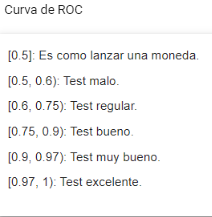

In [0]:
from sklearn import metrics
import numpy as np

def get_metrics(true_labels, predicted_labels, probabilidad):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 2))
  
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 2))
  
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 2))
  
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 2))

  print(" ")
  print("Confusion matrix :")
  print("   Predicho        ")
  print("  NO  /  YES")
  print(metrics.confusion_matrix(true_labels, predicted_labels))

  print(" ")
  #----------------------------- Curva de ROC --------------------------
  # Determine the false positive and true positive rates
  fpr, tpr, _ = metrics.roc_curve(true_labels, probabilidad)

  # Calculate the AUC
  roc_auc = metrics.auc(fpr, tpr)
  print('ROC AUC: %0.2f' % roc_auc)

  #Plot of a ROC curve for a specific class
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()

### REGRESION LOGISTICA

In [0]:
#NO LO VEO
from sklearn import linear_model, datasets, metrics
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [0]:
#NO LO VEO
%%time
# Gridsearch for logistic regression
# perform a grid search on the 'C' parameter of Logistic
params = {"C": [1.0, 10.0, 100.0]}
Grid_Search = GridSearchCV(LogisticRegression(), params, 
                           n_jobs = -1, verbose = 1)
Grid_Search.fit(X_train, y_train)
# print diagnostic information to the user and grab the
print( "Best Score: %0.3f" % (Grid_Search.best_score_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.616
CPU times: user 87.3 ms, sys: 28.9 ms, total: 116 ms
Wall time: 1.69 s


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.6s finished


In [0]:
#NO LO VEO
bestParams = Grid_Search.best_estimator_.get_params()
print(bestParams.items())

dict_items([('C', 1.0), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 100), ('multi_class', 'warn'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'warn'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)])


-------------TRAIN------------------
Accuracy: 0.63
Precision: 0.61
Recall: 0.63
F1 Score: 0.56
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 466 2354]
 [ 361 4064]]
 
ROC AUC: 0.61


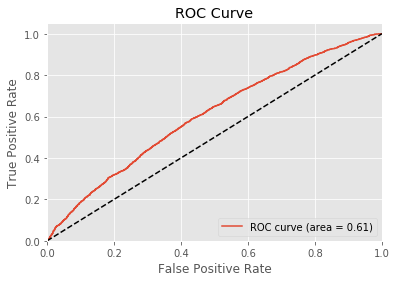

 
--------------TEST-------------------
Accuracy: 0.6
Precision: 0.56
Recall: 0.6
F1 Score: 0.52
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 168 1073]
 [ 172 1692]]
 
ROC AUC: 0.58


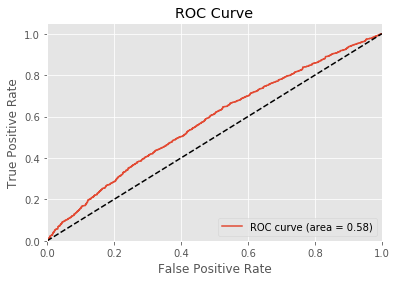

In [26]:
from sklearn.linear_model.logistic import LogisticRegression
logistic = LogisticRegression(C = 1)
logistic_orb_predictions_train, logistic_orb_predictions_test, clasificador = train_predict_evaluate_model(classifier=logistic,
                                                                                              train_features= X_train,
                                                                                              train_labels=y_train,
                                                                                              test_features = X_test,
                                                                                              test_labels=y_test)

In [27]:
import joblib
filename = os.path.join(directorio,"model_regresion_Orb_50")
joblib.dump(clasificador, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/model_regresion_Orb_50']

In [28]:
#load saved model
filename = os.path.join(directorio,"model_regresion_Orb_50")
mod = joblib.load(filename)
print(mod) 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### SVM

In [0]:
#no lo veo
%%time
#params = {'kernel':('linear','rbf'),'C':[1,10],'gamma':[0.0001]}
# Gridsearch for logistic regression
# perform a grid search on the 'C' parameter of Logistic
params = {"C": [1.0, 10.0, 100.0]}
Grid_Search = GridSearchCV(SVC(), params)
Grid_Search.fit(X_train, y_train)
# print diagnostic information to the user and grab the
print( "Best Score: %0.3f" % (Grid_Search.best_score_))

Best Score: 0.622
CPU times: user 40.3 s, sys: 133 ms, total: 40.5 s
Wall time: 40.5 s


In [0]:
#no lo veo
bestParams = Grid_Search.best_estimator_.get_params()
print(bestParams.items())

dict_items([('C', 1.0), ('cache_size', 200), ('class_weight', None), ('coef0', 0.0), ('decision_function_shape', 'ovr'), ('degree', 3), ('gamma', 'auto_deprecated'), ('kernel', 'rbf'), ('max_iter', -1), ('probability', False), ('random_state', None), ('shrinking', True), ('tol', 0.001), ('verbose', False)])


-------------TRAIN------------------
Accuracy: 0.74
Precision: 0.79
Recall: 0.74
F1 Score: 0.71
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1048 1772]
 [  83 4342]]
 
ROC AUC: 0.90


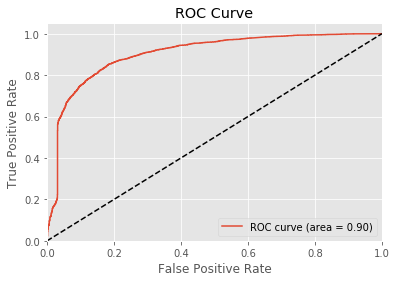

 
--------------TEST-------------------
Accuracy: 0.61
Precision: 0.58
Recall: 0.61
F1 Score: 0.53
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 165 1076]
 [ 149 1715]]
 
ROC AUC: 0.56


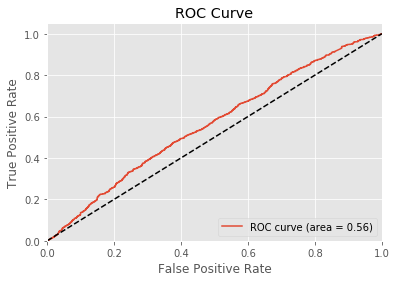

In [29]:
from sklearn.svm import SVC
clf = SVC( C=1, kernel='rbf', 
          random_state=0, probability=True)
clf_orb_predictions_train, clf_orb_predictions_test, clasificador = train_predict_evaluate_model(classifier=clf,
                                                                                              train_features= X_train,
                                                                                              train_labels=y_train,
                                                                                              test_features = X_test,
                                                                                              test_labels=y_test)

In [30]:
import joblib
filename = os.path.join(directorio,"model_svm_Orb_50")
joblib.dump(clasificador, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/model_svm_Orb_50']

In [31]:
#load saved model
filename = os.path.join(directorio,"model_svm_Orb_50")
mod = joblib.load(filename)
print(mod) 

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


## MLP


-------------TRAIN------------------
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1 Score: 0.58
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 557 2263]
 [ 323 4102]]
 
ROC AUC: 0.66


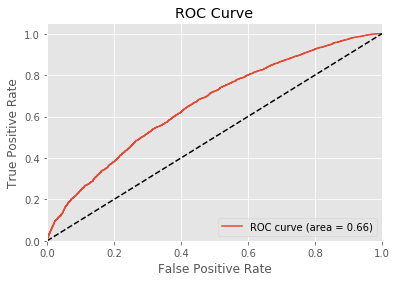

 
--------------TEST-------------------
Accuracy: 0.6
Precision: 0.56
Recall: 0.6
F1 Score: 0.53
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 179 1062]
 [ 187 1677]]
 
ROC AUC: 0.57


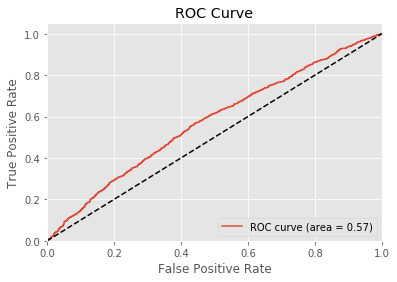

CPU times: user 4.51 s, sys: 2.76 s, total: 7.27 s
Wall time: 3.84 s


In [32]:
%%time
from sklearn.neural_network import MLPClassifier
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(50),
                    activation='logistic', max_iter = 100)
mlp_orb_predictions_train, mlp_orb_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

-------------TRAIN------------------
Accuracy: 0.65
Precision: 0.64
Recall: 0.65
F1 Score: 0.61
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 814 2006]
 [ 541 3884]]
 
ROC AUC: 0.66


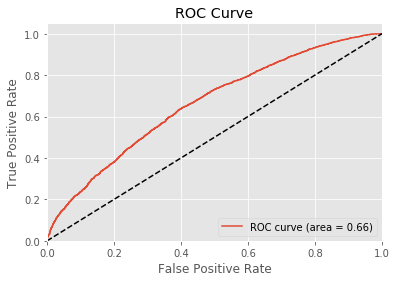

 
--------------TEST-------------------
Accuracy: 0.6
Precision: 0.57
Recall: 0.6
F1 Score: 0.55
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 253  988]
 [ 261 1603]]
 
ROC AUC: 0.58


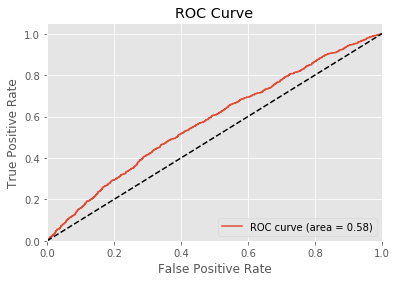

In [36]:
from sklearn.neural_network import MLPClassifier
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100),
                    activation='logistic', max_iter = 100)
mlp_orb_predictions_train, mlp_orb_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

-------------TRAIN------------------
Accuracy: 0.64
Precision: 0.63
Recall: 0.64
F1 Score: 0.59
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 606 2214]
 [ 383 4042]]
 
ROC AUC: 0.66


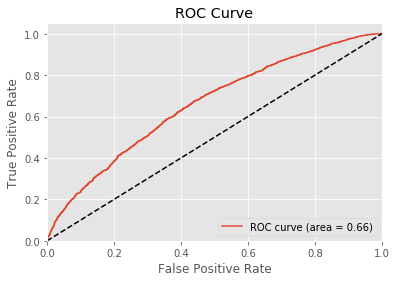

 
--------------TEST-------------------
Accuracy: 0.6
Precision: 0.57
Recall: 0.6
F1 Score: 0.54
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 205 1036]
 [ 200 1664]]
 
ROC AUC: 0.57


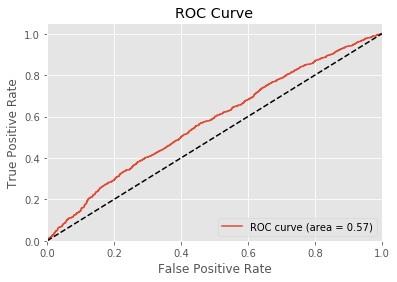

In [34]:
from sklearn.neural_network import MLPClassifier
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(150),
                    activation='logistic', max_iter = 100)
mlp_orb_predictions_train, mlp_orb_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

-------------TRAIN------------------
Accuracy: 0.7
Precision: 0.69
Recall: 0.7
F1 Score: 0.68
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[1188 1632]
 [ 573 3852]]
 
ROC AUC: 0.74


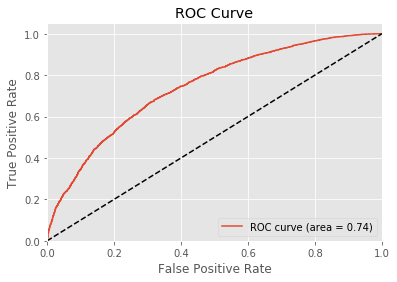

 
--------------TEST-------------------
Accuracy: 0.58
Precision: 0.56
Recall: 0.58
F1 Score: 0.55
 
Confusion matrix :
   Predicho        
  NO  /  YES
[[ 331  910]
 [ 381 1483]]
 
ROC AUC: 0.56


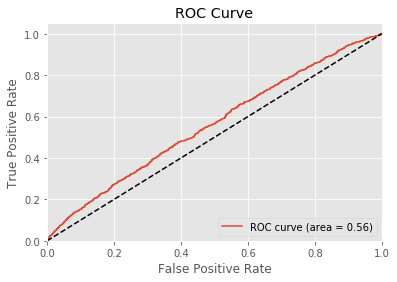

In [35]:
from sklearn.neural_network import MLPClassifier
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100),
                    activation='logistic', max_iter = 100)
mlp_orb_predictions_train, mlp_orb_predictions_test, clasificador = train_predict_evaluate_model(classifier=mlp,
                                                                                                     train_features= X_train,
                                                                                                      train_labels=y_train,
                                                                                                      test_features = X_test,
                                                                                                      test_labels=y_test)

In [37]:
import joblib
filename = os.path.join(directorio,"model_mlp_Orb_50")
joblib.dump(clasificador, filename)

['drive/My Drive/2019-2 #CICLO_10♥/TESIS 2/DATA/MODELOS_2/model_mlp_Orb_50']

In [38]:
#load saved model
filename = os.path.join(directorio,"model_mlp_Orb_50")
mod = joblib.load(filename)
print(mod) 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
